In [1]:
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis

In [2]:
import os, sys
sys.path.insert(0,os.path.realpath(os.path.pardir))

In [3]:
from utils.config import cfg
from utils.tools import image

c:\Users\nine_\anaconda3\envs\torch_cuda\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


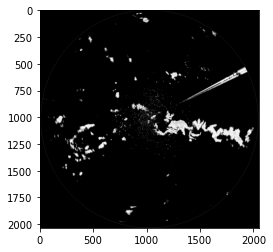

In [4]:
pic = cv2.imread("../data/bkk_radar_images/bkk_radar_images_dBZ_1/1592461954.png", 0)

plt.imshow(pic, cmap='gray')
plt.show()

In [5]:
class Dataloader():
    def __init__(self, pd_path):
        self.data = None
        self.df = pd.read_pickle(pd_path)
        self.df['FolderPath'] = '../data/bkk_radar_images/bkk_radar_images_dBZ_1/'
    
    def _load(self):
        self.df['img_path'] = self.df['FolderPath'] + self.df['FileName']
        self.data = image.quick_read_frames(path_list=self.df['img_path'].tolist(), grayscale=True)

In [6]:
pd_path = '../data/pd/bkk_1.pkl'
dataloader = Dataloader(pd_path)
dataloader._load()

In [7]:
dataloader.data.shape

(4863, 1, 2034, 2048)

In [8]:
dataloader.data[1].max()

## Unexpected Output!

222

In [9]:
data = dataloader.data

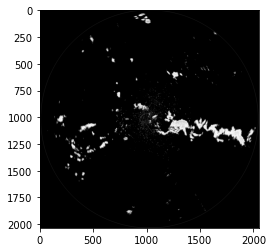

In [10]:
plt.imshow(data[1][0], cmap='gray')

In [9]:
# del dataloader

In [10]:
# mean = np.mean(data, axis=0)

In [11]:
# diff = data - np.expand_dims(mean,axis=0)

: 

: 

In [24]:
# var = np.var(data, ddof=1, axis=1)
# var

: 

: 

In [ ]:
# mahal_img = mahalanobis(pic, np.repeat(mean, 2034*2048), np.repeat(var, (2034*2048)**2).reshape(2034*2048,2034*2048))

In [ ]:
# diff = pic - mean
# S = diff @ diff.T / diff.shape[0]-1
# S = np.linalg.inv(S.T @ S) @ S.T

In [20]:
# S

1330.9802254550511

In [ ]:
# mean + 3*np.sqrt(var)

In [ ]:
# filltered_pic = np.zeros(pic.shape)

# for i in tqdm(range(pic.shape[0])):
#     # for j in range(pic.shape[1]):
#     dis = mahalanobis(pic[i], mean, 1/var)
#     if dis > (mean + 3*np.sqrt(var)):
#         filltered_pic[i] = 0
#     else:
#         filltered_pic[i] = pic[i]

In [ ]:
# filltered_pic = np.array(filltered_pic, dtype=np.uint32).reshape(2034,2048)

# plt.figure(figsize=(10, 10), dpi=80)
# plt.imshow(filltered_pic, cmap='gray')
# plt.show()

In [ ]:
# (filltered_pic.reshape(-1)-pic.reshape(-1)).sum()

In [ ]:
# mahalanobis(pic[0,0], mean, var)